# Initialize Fast Metric Calculations

In [1]:
from zotbin.binned import *

In [2]:
from tomo_challenge import load_redshift
from tomo_challenge.jax_metrics import ell_binning

Found classifier Random
You need to install the zotbin package:
  pip install git+https://github.com/dkirkby/zotbin.git
Found classifier ZotBin
Found classifier RandomForest
Found classifier IBandOnly


Load the true redshifts for the training data:

In [3]:
training_file='/media/data2/tomo_challenge_data/ugrizy_buzzard/training.hdf5'
training_z = load_redshift(training_file)

Calculate z bin edges equally spaced in comoving distance over [0,3].

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/jax/lax/lax.py:5905: UserWarning: Explicitly requested dtype <class 'jax.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


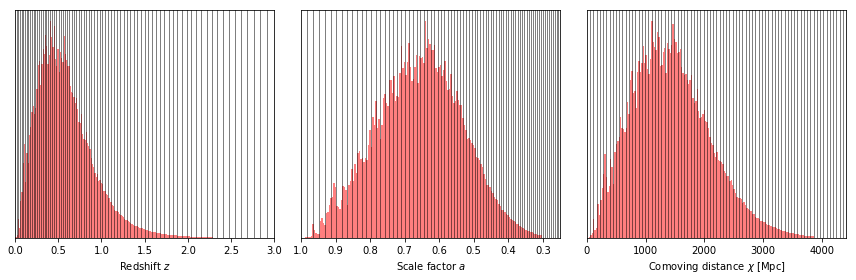

In [4]:
zedges = get_zedges(3.0, 80, zplot=training_z)

Initialise the multipoles to use:

In [5]:
ell, _ = ell_binning()

Calculate the cl's and their partials using these redshift bins:

In [6]:
%time ngals, noise, cl_in = init_binned_cl(zedges, ell, nagrid=4096)

0 (12880, 100)
1 (12880, 100)
2 (12880, 100)
3 (12880, 100)
4 (12880, 100)
5 (12880, 100)
6 (12880, 100)
(12880, 100)
CPU times: user 25min 11s, sys: 1min 56s, total: 27min 7s
Wall time: 23min 18s


Save the results for using later:

In [8]:
save_binned('binned_3_80.npz', zedges, ell, ngals, noise, cl_in)